# **Instructions**
To start the exercise, follow the steps:
1.   Download both the images 'cat.png' and 'TULogo.png' [here](https://drive.google.com/drive/folders/1Gg7g6UI1qluqb65yClzWbwptpWmnEk4g?usp=drive_link)
2.   Save a copy of this notebook in Google Drive (select `File` $\rightarrow$ `Save a copy in Drive`) and open it.
3.   Go to the `Files` section in Colab (select the folder icon on the left sidebar)
4.   Upload the two images (drag and drop or select ```Upload to session storage```)
5.   Run the first code cell below to import the Python packages and plot the images
6.   If you can see the two images, everything worked well and you can start the exercise! Otherwise, for the sake of time, please ask a fellow student to work together.

In this notebook, you will explore the effects of different components of a convolutional layer on the test images $x_\text{logo}$ and $x_\text{cat}$.
Each component (e.g. the kernel function $k$) has some parameters that you can modify. First, run the code block once, then use the provided sliding bars to adjust the parameters. Wait a few seconds to see the result of applying that component to the input (e.g. use the slider to choose the parameters of the kernel $k$ and wait for the convolution $x*k$ to be computed and displayed). Reflect on how the chosen parameters and component affect the outcome. We will discuss this together afterwards.

**Note: this is not a programming exercise. You won't need to modify code lines. Instead, only run the code blocks, play with the sliding bars and reflect on the output.**

# **Import Packages and Data**
Run the cell below to import the required Python packages and the test images

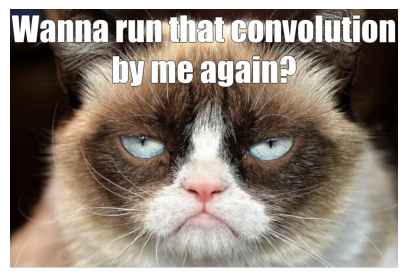

Shape of cat (1068, 1600, 3)
Maximum value: 255 
Minimum value: 0


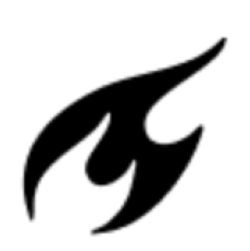

Shape of logo (166, 166)
Maximum value: 255 
Minimum value: 0


In [ ]:
# @title
#Import packages
import ipywidgets as widgets
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from scipy.signal import convolve2d, correlate
from scipy.ndimage import convolve

#Import and visualize images
cat  = Image.open('cat.png')
rgba_logo = Image.open('TULogo.png')

logo = rgba_logo.convert('L')

cat_grey = cat.convert('L')

logo = np.array(logo)
cat = np.array(cat)[:,:,:-1]

cat_grey = np.array(cat_grey)

plt.figure(figsize=(5, 5))
plt.imshow(cat)
plt.axis('off')
plt.show()

print('Shape of cat', cat.shape)
max_value, min_value = np.max(cat),np.min(cat)
print(f"Maximum value: {max_value} \nMinimum value: {min_value}")

plt.figure(figsize=(3, 3))
plt.imshow(logo,cmap='gray')
plt.axis('off')
plt.show()
print('Shape of logo', logo.shape)
max_value, min_value = np.max(logo),np.min(logo)

# Print the maximum and minimum values
print(f"Maximum value: {max_value} \nMinimum value: {min_value}")


#**First Example**
Run the cell below to see the result of the convolution with kernel
$
k=
\begin{bmatrix}
0 & 0 & 0\\
0& a & 0\\
0 & 0 & 0
\end{bmatrix}
$

In [ ]:
# @title
titles = ['Original', 'Convolution']

def plot_convolution(a):
    kernel =np.array([[0,0,0],[0,a,0],[0,0,0]])
    conv = correlate(logo, kernel, mode ='valid')
    images = [logo, conv]
    print(' kernel\n',kernel)
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()

interact (plot_convolution, a=widgets.IntSlider(min=-1, max=1, step=1, value=10))

interactive(children=(IntSlider(value=1, description='a', max=1, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.plot_convolution(a)>

#**Translations**
Run the cell below to see the result of the convolution with kernel
$k\in\mathbb{R}^{11\times 11}$,
$k_{n,m}=\begin{cases}
1 & \text{if } (n,m)=(i,j)\\
0 & \text{otherwise}
\end{cases}
$

In [ ]:
# @title
titles = ['Original', 'Convolution']

#size_widget = widgets.IntSlider(min=3, max=21, step=1, value=11)
i_widget = widgets.IntSlider(min=0, max=10, step=1, value=5)
j_widget = widgets.IntSlider(min=0, max=10, step=1, value=5)

def plot_convolution(i,j,size):
    if i >= size or j>=size:
        raise ValueError("Matrix index is out of the matrix size range.")
    kernel = np.zeros((size,size))
    kernel[i,j]=1
    print(' kernel\n',kernel)
    image=logo
    conv = correlate(image, kernel, mode ='valid')
    images = [image, conv]
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()

interact(plot_convolution,
          size=fixed(11),
          i=i_widget,
          j=j_widget
          )

interactive(children=(IntSlider(value=5, description='i', max=10), IntSlider(value=5, description='j', max=10)…

<function __main__.plot_convolution(i, j, size)>

# **Padding**
Run the code cell below to see the result of using *zero padding* on the convolution with kernel
$
k =
\begin{pmatrix}
1 & 0 & \dots & 0\\
0 &   &       & \dots\\
\dots \\
0 & \dots & & 0
\end{pmatrix}
\in\mathbb{R}^{size\times size}
$

In [ ]:
# @title
size_widget = widgets.IntSlider(min=2, max=50, step=2, value=2)
#i_widget = widgets.IntSlider(min=0, max=10, step=1, value=5)
#j_widget = widgets.IntSlider(min=0, max=10, step=1, value=5)

titles = ['Original\n','Convolution \n no padding', 'Convolution  \n zero padding']
def plot_convolution(i,j, size):
    if i >= size or j>=size:
        raise ValueError("Matrix index is out of the matrix size range.")
    kernel = np.zeros((size,size))
    i=int((size-1)/2)
    j=int(size -1)
    kernel[0,0]=1

    image=logo

    conv = correlate(image, kernel, mode ='valid')
    conv_pad = correlate(image, kernel, mode ='same')

    images = [image, conv,conv_pad]

    fig, axes = plt.subplots(1, 3, figsize=(8,8))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        #axes[i].text(5, 8, subtitles[i])
    plt.tight_layout()
    plt.show()
    print(f'Shapes :', logo.shape, '                   ', conv.shape, '                   ',conv_pad.shape,'\n\n')

interact(plot_convolution,
          size=size_widget,
          i=fixed(int((size_widget.value-1)/2)),
          j=fixed(size_widget.value-1),
          )

interactive(children=(IntSlider(value=2, description='size', max=50, min=2, step=2), Output()), _dom_classes=(…

<function __main__.plot_convolution(i, j, size)>

# **Moving Average**
Run the cell below to see the result of the convolution with kernel
$k\in \mathbb{R}^{size\times size}$ with $k_{n,m} = \frac{1}{size^2} $ for every $i,j$.


In [ ]:
# @title
size_widget = widgets.IntSlider(min=3, max=30, step=1, value=3)

titles = ['Original','Convolution']

def plot_convolution(size,image):
    kernel = (1/size**2)*np.ones((size,size))
    if image == 'cat':
        image =cat_grey
        figsize= (8,8)
    else:
        image = logo
        figsize = (6,6)
    conv = correlate(image, kernel, mode ='same')
    images = [image, conv]

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    for i,title in enumerate(titles):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()

interact(plot_convolution,
          size=size_widget,
          image= ['logo','cat']
          )

interactive(children=(IntSlider(value=3, description='size', max=30, min=3), Dropdown(description='image', opt…

<function __main__.plot_convolution(size, image)>

# **Detector**
Run the cell below to see the result of applying a ReLU activation function to the convolution with kernel
$k=
\begin{pmatrix}
0 & a & 0\\
b & 0 & c \\
0 & d & 0
\end{pmatrix}
$

In [ ]:
# @title
#size_widget = widgets.IntSlider(min=11, max=51, step=10, value=11)
a_widget = widgets.IntSlider(min=-1, max=1, step=1, value=0)
b_widget = widgets.IntSlider(min=-1, max=1, step=1, value=0)
c_widget = widgets.IntSlider(min=-1, max=1, step=1, value=0)
d_widget = widgets.IntSlider(min=-1, max=1, step=1, value=0)

titles = ['Original\n','Convolution']

def plot_convolution(a,b,c,d,size,ReLU):
    image = logo
    kernel = np.array([[0,a,0],[b,0,c],[0,d,0]])
    print(' kernel\n',kernel)
    conv = correlate(image, kernel, mode ='same')
    if ReLU=='True':
        conv=np.maximum(conv,0)
    images = [image, conv]

    fig, axes = plt.subplots(1, 2, figsize=(6,6))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()
    print(f'Maximum value:', np.max(logo),'                   ', np.max(conv))
    print(f'Minimum value:', np.min(logo),'                     ', np.min(conv),'\n\n')



interact(plot_convolution,
          size=fixed(3),
          a=a_widget,
          b=b_widget,
          c=c_widget,
          d=d_widget,
          ReLU = ['False','True']
          )

interactive(children=(IntSlider(value=0, description='a', max=1, min=-1), IntSlider(value=0, description='b', …

<function __main__.plot_convolution(a, b, c, d, size, ReLU)>

# **Input channels**
Run the cell below to see the result of the convolution with kernel
$
k \in\mathbb{R}^{3\times 3\times 3}
$ with $k_{1,1,p}=1$ and $0$ otherwise

In [ ]:
# @title
k_widget = widgets.IntSlider(min=0, max=2, step=1, value=2)

titles = ['Original','Convolution']

def plot_convolution(i,j,p,size):
    kernel = np.zeros((size,size,3))
    kernel[i,j,p]=1
    out = convolve (cat,kernel,mode='constant')
    images = [cat, out]

    fig, axes = plt.subplots(1, 2, figsize=(8,8))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i])
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        #axes[i].text(5, 8, subtitles[i])
    plt.tight_layout()
    plt.show()

interact(plot_convolution,
          size=fixed(3),
          i=fixed(1),
          j=fixed(1),
          p=k_widget
          )

interactive(children=(IntSlider(value=2, description='p', max=2), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_convolution(i, j, p, size)>

# **Output Channels or Feature Maps**
Run the cell below to see the result of the convolution with 3 filters with kernels $k_r, k_g, k_b\in\mathbb{R}^{3\times 3}$
$
k_r =
\begin{pmatrix}
0 & 1 & 0\\
0 & 0 & 0\\
0 & -1 & 0  
\end{pmatrix}
\qquad
k_g =
\begin{pmatrix}
0 & 0 & 0\\
-1 & 0 & 1\\
0 & 0 & 0  
\end{pmatrix}
\qquad
k_b =
\begin{pmatrix}
0 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & 0  
\end{pmatrix}
$

bias $b =(0,0,255)$ and ReLU activation function.

In [ ]:
# @title
kernel_r = np.array([[0,1,0],[0,0,0],[0,-1,0]])
kernel_g = np.array([[0,0,0],[-1,0,1],[0,0,0]])
kernel_b = np.array([[0,0,0],[0,-1,0],[0,0,0]])

bias = 255 * np.ones_like (logo)

channel_r = correlate(logo,kernel_r,mode ='same')
channel_g = correlate(logo,kernel_g,mode ='same')
channel_b = correlate(logo,kernel_b,mode ='same')

channel_b = bias + channel_b

channel_r = np.maximum(channel_r,0)
channel_g = np.maximum(channel_g,0)
channel_b = np.maximum(channel_b,0)

titles= ['','Feature Maps','']
images= [channel_r,channel_g, channel_b]
maps =['Reds', 'Greens', 'Blues']

fig, axes = plt.subplots(1, 3, figsize=(7, 7))
for i,title in enumerate(titles):
    axes[i].imshow(images[i], cmap=maps[i])
    axes[i].set_title(title)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

out = np.dstack((channel_r,channel_g,channel_b))

titles = ['Original', 'Output']
images = [logo, out,]
maps = ['gray','viridis']

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

for i,title in enumerate(titles):
    axes[i].imshow(images[i], cmap=maps[i])
    axes[i].set_title(title)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

# **Pooling**
Run the cell below to apply *Max pooling* with adjustable pooling size to $x_{cat}$. Then, check the result of max pooling with size = 2 to the feature maps defined in the previous cell.

In [ ]:
# @title
width_widget = widgets.IntSlider(min=1, max=20, step=1, value=1)

titles = ['Original','Pooled']

def plot_pooling(width):
    Pooling = torch.nn.MaxPool2d((width,width))
    cat_original = np.copy(cat_grey)
    cat_pooled=Pooling(torch.Tensor(cat_grey).view(1,cat_grey.shape[0],cat_grey.shape[1]))
    cat_pooled=cat_pooled.view(cat_pooled.shape[1:]).numpy().astype(int)

    images = [cat_original, cat_pooled]

    fig, axes = plt.subplots(1, 2, figsize=(8,8))
    for i,title in enumerate(titles):
        axes[i].imshow(images[i],cmap='gray')
        axes[i].set_title(title)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.tight_layout()
    plt.show()
    print(f'Shapes:', cat_original.shape,'                           ', cat_pooled.shape,'\n\n')


interact(plot_pooling,
          width=width_widget)

In [ ]:
# @title

Pooling = torch.nn.MaxPool2d((2,2),(2,2))

channel_r_pooled = Pooling(torch.Tensor(channel_r).view(1,channel_r.shape[0],channel_r.shape[1]))
channel_g_pooled = Pooling(torch.Tensor(channel_g).view(1,channel_r.shape[0],channel_r.shape[1]))
channel_b_pooled = Pooling(torch.Tensor(channel_b).view(1,channel_r.shape[0],channel_r.shape[1]))

channel_r_pooled=channel_r_pooled.view(channel_r_pooled.shape[1:]).numpy().astype(int)
channel_g_pooled=channel_g_pooled.view(channel_g_pooled.shape[1:]).numpy().astype(int)
channel_b_pooled=channel_b_pooled.view(channel_b_pooled.shape[1:]).numpy().astype(int)

out_pooled = np.dstack((channel_r_pooled,channel_g_pooled,channel_b_pooled)).astype(int)

titles= ['','Feature Maps','']
images= [channel_r_pooled,channel_g_pooled, channel_b_pooled]
maps =['Reds', 'Greens', 'Blues']

fig, axes = plt.subplots(1, 3, figsize=(7, 7))
for i,title in enumerate(titles):
    axes[i].imshow(images[i], cmap=maps[i])
    axes[i].set_title(title)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

titles = ['Original', 'Output']
images = [logo, out_pooled]
maps = ['gray','viridis']

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

for i,title in enumerate(titles):
    axes[i].imshow(images[i], cmap=maps[i])
    axes[i].set_title(title)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()